## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [370]:
Michal Ostrowski
part time
Matthew Bombard

SyntaxError: invalid syntax (<ipython-input-370-69b90f85455b>, line 1)

In [371]:
#importing libraries

In [372]:
import pandas as pd
import sqlite3 as sql
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter

In [373]:
#importing csv, tsv files

In [374]:
bom_movie_gross_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\bom.movie_gross.csv')
rt_movie_info_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\rt.movie_info.tsv', sep='\t')
rt_reviews_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\rt.reviews.tsv', sep='\t', encoding = 'unicode_escape')
tmbd_movies_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\tmdb.movies.csv')
tn_movie_budgets_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\tn.movie_budgets.csv')

### Exploratory analysis

In [375]:
#viewing first 5 rows of bom_movie_gross_df

In [376]:
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [377]:
#printing a summary of bom_movie_gross_df

In [378]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [379]:
#printing descriptive statistics of bom_movie_gross_df

In [380]:
bom_movie_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [381]:
#viewing first 5 rows of rt_movie_info_df

In [382]:
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [383]:
#printing a summary of rt_movie_info_df

In [384]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [385]:
#printing descriptive statistics of rt_movie_info_df

In [386]:
rt_movie_info_df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [387]:
# printing the first 5 rows of rt_reviews_df

In [388]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [389]:
# printing a summary of rt_reviews_df

In [390]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [391]:
# printing descriptive statistics of rt_reviews_df

In [392]:
rt_reviews_df.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [393]:
#printing first 5 rows of tmbd_movies_df

In [394]:
tmbd_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [395]:
# printing a summary of tmbd_movies_df

In [396]:
tmbd_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [397]:
#printing descriptive statistics of tmbd_movies_df

In [398]:
tmbd_movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [399]:
#printing first 5 rows of tn_movie_budgets_df

In [400]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [401]:
# printing a summary of tn_movie_budgets_df

In [402]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [403]:
#printing descriptive statistics of tn_movie_budgets_df

In [404]:
tn_movie_budgets_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


### tn_movie_budgets_df cleaning

In [405]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace(',', '')#removing commas in column

In [406]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace('$', '')#removing $ in column

In [407]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace(',', '')#removing commas in column

In [408]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace('$', '')#removing $ in column

In [409]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace(',', '')#removing commas in column

In [410]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace('$', '')#removing $ from column

In [411]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].astype('int64')#converting values to type integer in column

In [412]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].astype('int')#converting values in column to integer type

In [413]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace('\d+', '') #removing digit chars from release date to convert to month only

In [414]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace(',', '')#removing commas from release date column values

In [415]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace(' ', '')#removing empty space from release date column values

In [416]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].astype('str')#changing release date to string type

In [417]:
tn_movie_budgets_df.drop(tn_movie_budgets_df[tn_movie_budgets_df['worldwide_gross'] == 0].index, inplace = True)#dropping rows with 0 ww gross

In [418]:
tn_movie_gross_head = tn_movie_budgets_df.sort_values(by=['worldwide_gross'], ascending=False).head(10)#sorting values of worldwide gross by descending

### Graphing top ten worldwide gross

In [989]:
tn_movie_gross_head

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec,Avatar,425000000,760507625,2776345279
42,43,Dec,Titanic,200000000,659363944,2208208395
5,6,Dec,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,Apr,Avengers: Infinity War,300000000,678815482,2048134200
33,34,Jun,Jurassic World,215000000,652270625,1648854864
66,67,Apr,Furious 7,190000000,353007020,1518722794
26,27,May,The Avengers,225000000,623279547,1517935897
3,4,May,Avengers: Age of Ultron,330600000,459005868,1403013963
41,42,Feb,Black Panther,200000000,700059566,1348258224
260,61,Jul,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157


In [1014]:
hue_order = ['Avatar', 'Titanic', 'Star Wars Ep. VII: The Force Awakens', 'Avengers: Infinity War', 'Jurassic World', 'Furious 7', 'The Avengers', 'Avengers: Age of Ultron', 'Black Panther', 'Harry Potter and the Deathly Hallows: Part II']

Text(0.5, 1.0, 'Movie Vs Worldwide Gross and Production Budget(Top Ten)')

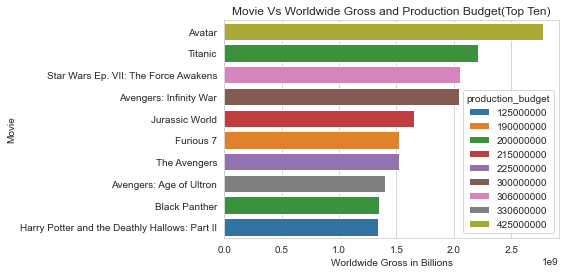

In [1021]:
sns.barplot(x = 'worldwide_gross', y = 'movie', hue = 'production_budget', data = tn_movie_gross_head, dodge=False)

plt.xlabel('Worldwide Gross in Billions')
plt.ylabel('Movie')
plt.title('Movie Vs Worldwide Gross and Production Budget(Top Ten)')


In [1026]:
# random sample of budget vs gross

In [1061]:
random_budget_vs_gross_sample = tn_movie_budgets_df.sample(10, random_state = 1)

In [1063]:
random_budget_vs_gross_sample

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1013,14,May,Shanghai Noon,55000000,56932305,71189835
2146,47,Jan,Highlander: The Final Dimension,26000000,13738574,13738574
1034,35,Dec,Aeon Flux,55000000,25857987,53913573
1782,83,Oct,Freaks of Nature,33000000,70958,70958
4931,32,May,Son of Rambow: A Home Movie,2000000,1785505,11263263
1599,100,Jan,The Rite,37000000,33047633,97143987
1163,64,Feb,Zoolander 2,50000000,28848693,55348693
201,2,Nov,Rise of the Guardians,145000000,103412758,306900902
3792,93,Nov,The Savages,9000000,6623082,10642023
1418,19,Aug,The Final Destination,40000000,66477700,187384627


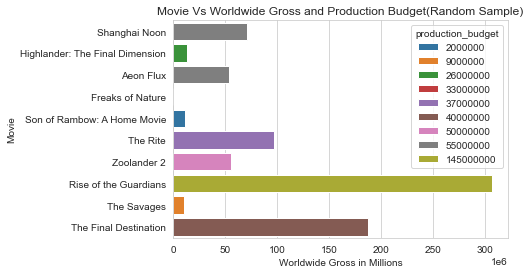

In [1067]:
sns.barplot(x = 'worldwide_gross', y = 'movie', hue = 'production_budget', data = random_budget_vs_gross_sample, dodge=False)

plt.xlabel('Worldwide Gross in Millions')
plt.ylabel('Movie')
plt.title('Movie Vs Worldwide Gross and Production Budget(Random Sample)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))

### Graphing production budget of top ten gross

Text(0.5, 1.0, 'Movie Vs Production Budget (Top Ten)')

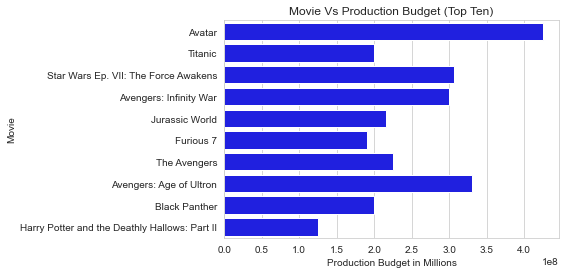

In [420]:
sns.barplot(x = 'production_budget', y = 'movie', data = tn_movie_gross_head, color = 'Blue')

plt.xlabel('Production Budget in Millions')
plt.ylabel('Movie')
plt.title('Movie Vs Production Budget (Top Ten)')

### Starting Graphs for bottom ten gross

In [421]:
tn_movie_gross_tail = tn_movie_budgets_df.sort_values(by=['worldwide_gross'], ascending=True).head(10)#sorting values of worldwide gross by ascending

In [422]:
#graphing bottom ten worldwide gross

Text(0.5, 1.0, 'Movie Vs Worldwide Gross Bottom Ten')

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


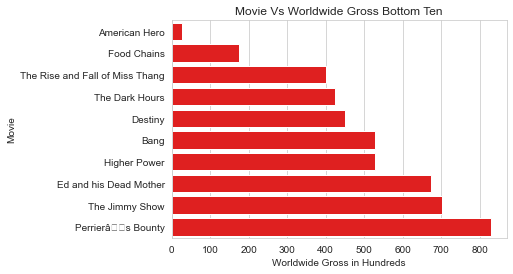

In [423]:
sns.barplot(x = 'worldwide_gross', y = 'movie', data = tn_movie_gross_tail, color = 'Red')

plt.xlabel('Worldwide Gross in Hundreds')
plt.ylabel('Movie')
plt.title('Movie Vs Worldwide Gross Bottom Ten')

Text(0.5, 1.0, 'Movie Vs Production Budget (Bottom Ten)')

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


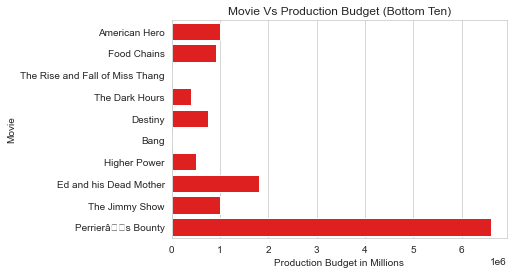

In [424]:
#making barplot for production budget of bottom ten gross

sns.barplot(x = 'production_budget', y = 'movie', data = tn_movie_gross_tail, color = 'Red')

plt.xlabel('Production Budget in Millions')
plt.ylabel('Movie')
plt.title('Movie Vs Production Budget (Bottom Ten)')

In [425]:
# Scatter plot to show relation between money put in and money gotten out

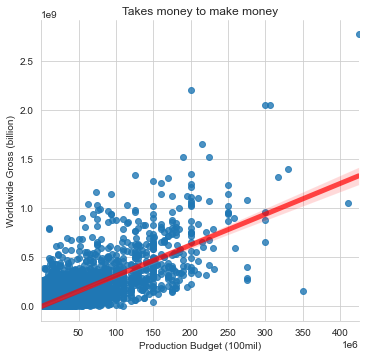

In [1116]:
sns.lmplot(data=tn_movie_budgets_df, x='production_budget', y='worldwide_gross', line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set_style('whitegrid')


plt.xlabel("Production Budget (100mil)")
plt.ylabel("Worldwide Gross (billion)")
plt.title('Takes money to make money')
plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))

In [ ]:
#barplot top ten vs random sample

In [1117]:
tn_movie_budgets_df.head(10).append(tn_movie_budgets_df.tail(10))

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec,Avatar,425000000,760507625,2776345279
1,2,May,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Jun,Dark Phoenix,350000000,42762350,149762350
3,4,May,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Dec,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,Dec,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,Apr,Avengers: Infinity War,300000000,678815482,2048134200
7,8,May,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,Nov,Justice League,300000000,229024295,655945209
9,10,Nov,Spectre,300000000,200074175,879620923


### Starting Release Month VS average Gross

In [427]:
release_date_group = tn_movie_budgets_df.groupby('release_date')#creating group of release date(month)

In [428]:
month_group_world = release_date_group.sum(['worldwide_gross'])#finding sum of worldwide gross in release date(month)

In [429]:
monthly_gross_avg = tn_movie_budgets_df.groupby('release_date')['worldwide_gross'].mean().astype('int64')#finding average of worldwide gross from releasedate group, setting to integer type

In [430]:
month_group_world['month_gross_avg'] = monthly_gross_avg.astype('int64')#setting month_group_world ti integer

In [431]:
month_group_world.reset_index(inplace=True)#resettting index of month group world

In [432]:
month_group_world.dtypes# checking datatypes 

release_date          object
id                     int64
production_budget    float64
worldwide_gross        int64
month_gross_avg        int64
dtype: object

In [433]:
#graphing average gross vs month of release

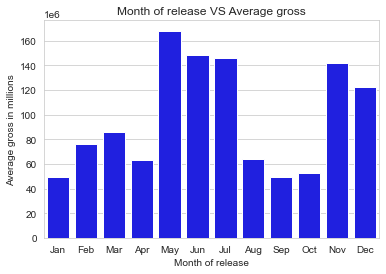

In [434]:
sns.barplot(x = 'release_date',
            y = 'month_gross_avg',
            data = month_group_world,
            order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            color = 'Blue')

plt.xlabel('Month of release')
plt.ylabel('Average gross in millions')
plt.title('Month of release VS Average gross')
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))

In [435]:
#graphing total worldwide gross vs month of release

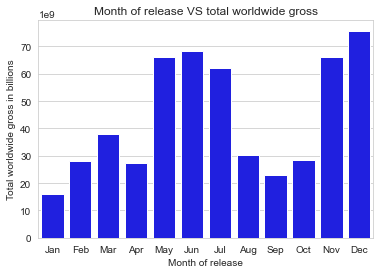

In [436]:
sns.barplot(x = 'release_date',
            y = 'worldwide_gross',
            data = month_group_world,
            order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            color = 'Blue')

plt.xlabel('Month of release')
plt.ylabel('Total worldwide gross in billions')
plt.title('Month of release VS total worldwide gross')
plt.ticklabel_format(style='sci', axis='y', scilimits=(9,9))

In [437]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
Unzipped Data
UnzippedData
awesome.gif
dsc-phase-1-project-v2-4
im.db
movie_data_erd.jpeg
my work-Copy1.ipynb
my work.ipynb
student.ipynb
zippedData


In [438]:
#importing SQL db

In [439]:
conn = sql.connect("im.db")

In [440]:
type(conn)

sqlite3.Connection

In [441]:
cur = conn.cursor()

In [442]:
pd.read_sql_query("SELECT * from sqlite_master;", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,movie_budgets,movie_budgets,41369,"CREATE TABLE movie_budgets(\n ""id"" TEXT,\n ""..."
9,table,tmdb_movies,tmdb_movies,41472,"CREATE TABLE tmdb_movies(\n """" TEXT,\n ""genr..."


In [443]:
#query of the average number of votes from SQL db movie_ratings

In [444]:
avg_votes = pd.read_sql("""
SELECT avg(numvotes)
FROM movie_ratings
""", conn)

In [445]:
avg_votes

,avg(numvotes)
0,3523.662167


In [446]:
#query of average ratings above 9 for writers

In [447]:
query1 = pd.read_sql("""
SELECT DISTINCT averagerating, primary_name, numvotes
FROM movie_ratings
INNER JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
INNER JOIN writers
    ON movie_basics.movie_id = writers.movie_id
INNER JOIN persons
    ON writers.person_id = persons.person_id
WHERE death_year is null AND numvotes > 3500 AND averagerating >= 9.0
""", conn)

In [448]:
query1

,averagerating,primary_name,numvotes
0,9.4,Ram,9629
1,9.4,Anjana Krishnakumar,9629
2,9.0,Mari Selvaraj,4854
3,9.3,Alper Caglar,100568
4,9.3,Syed Gaosul Alam Shaon,18470
5,9.3,Anam Biswas,18470
6,9.3,Adnan Adib Khan,18470
7,9.2,Mahesh Manjrekar,4297
8,9.2,Abhijeet Shirish Deshpande,4297
9,9.2,Kiran Yadnyopavit,4297


In [449]:
query1.sort_values('averagerating', ascending=False)#sorting by top average writers

,averagerating,primary_name,numvotes
17,9.7,Quentin Tarantino,5600
10,9.5,Saman Weeraman,6509
1,9.4,Anjana Krishnakumar,9629
0,9.4,Ram,9629
4,9.3,Syed Gaosul Alam Shaon,18470
5,9.3,Anam Biswas,18470
6,9.3,Adnan Adib Khan,18470
3,9.3,Alper Caglar,100568
16,9.3,Donavon Warren,17308
7,9.2,Mahesh Manjrekar,4297


In [450]:
grouped_writers = query1.groupby('primary_name')#grouping writers by name
writer_avg_rating = grouped_writers.mean('averagerating')# finding average rating of writers
writer_avg_rating = writer_avg_rating.reset_index()#reseting index

In [451]:
writer_avg_rating.sort_values(by=['averagerating'], ascending=False)#sorting average rating writers by avgrating

,primary_name,averagerating,numvotes
13,Quentin Tarantino,9.7,5600
16,Saman Weeraman,9.5,6509
4,Anjana Krishnakumar,9.4,9629
14,Ram,9.4,9629
17,Syed Gaosul Alam Shaon,9.3,18470
2,Alper Caglar,9.3,100568
3,Anam Biswas,9.3,18470
7,Donavon Warren,9.3,17308
1,Adnan Adib Khan,9.3,18470
10,Mahesh Manjrekar,9.2,4297


In [856]:
writer_avg_rating.describe()

,averagerating,numvotes
count,18.000000,18.000000
mean,9.261111,15589.222222
std,0.168519,23259.560690
min,9.000000,4162.000000
25%,9.125000,4297.000000
50%,9.250000,6054.500000
75%,9.300000,18179.500000
max,9.700000,100568.000000


In [857]:
#query movies/genre/writer with their average rating having more than 3500 votes
genre_query = pd.read_sql("""
SELECT DISTINCT averagerating, primary_name, genres, original_title, movie_basics.movie_id
FROM movie_ratings
INNER JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
INNER JOIN writers
    ON movie_basics.movie_id = writers.movie_id
INNER JOIN persons
    ON writers.person_id = persons.person_id
WHERE death_year is null AND numvotes > 18179
""", conn)

In [858]:
genre_query.sort_values('averagerating', ascending=False).head(50)#sorting genre query by average rating descending

,averagerating,primary_name,genres,original_title,movie_id
817,9.3,Syed Gaosul Alam Shaon,"Crime,Mystery,Thriller",Aynabaji,tt5354160
818,9.3,Anam Biswas,"Crime,Mystery,Thriller",Aynabaji,tt5354160
819,9.3,Adnan Adib Khan,"Crime,Mystery,Thriller",Aynabaji,tt5354160
782,9.3,Alper Caglar,"Action,Drama,War",Dag II,tt5813916
2393,9.2,Cem Yilmaz,"Comedy,Documentary",CM101MMXI Fundamentals,tt2592910
3718,8.8,Christopher Markus,"Action,Adventure,Sci-Fi",Avengers: Endgame,tt4154796
3719,8.8,Stephen McFeely,"Action,Adventure,Sci-Fi",Avengers: Endgame,tt4154796
3720,8.8,Jim Starlin,"Action,Adventure,Sci-Fi",Avengers: Endgame,tt4154796
1012,8.8,Jeethu Joseph,"Crime,Drama,Thriller",Drishyam,tt3417422
3920,8.8,Christopher Nolan,"Action,Adventure,Sci-Fi",Inception,tt1375666


In [859]:
genre_query['genres'] = genre_query['genres'].str.replace('Sci-Fi', 'Sci_Fi')#changing sci-fi to sci_fi

In [860]:
grouped_genre = genre_query.groupby('genres')#grouping genres
genre_avg_rating = grouped_genre.mean('averagerating')#getting mean of average rating
genre_avg_rating = genre_avg_rating.reset_index()#resetting index of groouped genre

In [861]:
genre_avg_rating.sort_values(by = 'averagerating', ascending = False).head(10)#top ten average ratings by genre

,genres,averagerating
115,"Biography,Documentary,Sport",8.60
183,"Documentary,Music",8.50
49,"Action,Drama,War",8.50
135,"Comedy,Documentary",8.35
168,"Crime,Documentary",8.30
87,"Adventure,Drama,Sci_Fi",8.30
215,"Drama,Mystery,War",8.30
184,"Documentary,News",8.30
169,"Crime,Documentary,History",8.20
114,"Biography,Documentary,Music",8.20


In [862]:
# seperating genres comma list 

In [863]:
genres_expanded = genre_query['genres'].str.split(',', expand=True)
genres_expanded.columns = ['Genres'+str(i) for i in genres_expanded.columns]

In [864]:
# concat back to dataframe

In [865]:
genres_expanded_concat = pd.concat([genre_query, genres_expanded], axis=1)

In [866]:
#creating new df with comma seperated genres as their own columns
genres_expanded_group = genres_expanded_concat.groupby(['Genres0', 'Genres1', 'Genres2'])
genre_avg_rating = genres_expanded_group.mean('averagerating')
genre_avg_rating = genre_avg_rating.reset_index()

In [867]:
genre_avg_rating.sort_values(by = 'averagerating')#sorting top ten averageratings by descending

,Genres0,Genres1,Genres2,averagerating
39,Action,Drama,Horror,4.300000
48,Action,Fantasy,Thriller,4.740000
37,Action,Drama,Fantasy,5.033333
139,Comedy,Mystery,Sci_Fi,5.100000
24,Action,Comedy,Music,5.100000
...,...,...,...,...
141,Crime,Documentary,History,8.200000
79,Adventure,Drama,Sci_Fi,8.300000
174,Drama,Mystery,War,8.300000
45,Action,Drama,War,8.500000


In [868]:
melted_genre = genre_avg_rating.melt(var_name='index', value_name='')# changing df to long

### Creating DF of genre totals with 3 different columns from the comma seperated values

In [869]:
crosstab_genres = pd.crosstab(index=melted_genre[''], columns=melted_genre['index'])

In [870]:
crosstab_genres['total_count'] = crosstab_genres['Genres0'] + crosstab_genres['Genres1'] + crosstab_genres['Genres2']
#creating new column with total amounts of movies per genre

In [871]:
crosstab_genres.sort_values(by = 'averagerating').sort_values(by = 'total_count', ascending = False).head(21)

index,Genres0,Genres1,Genres2,averagerating,total_count
,,,,,
Drama,28,50,13,0,91
Action,58,0,0,0,58
Comedy,29,22,5,0,56
Adventure,31,13,0,0,44
Horror,5,18,12,0,35
Crime,10,16,8,0,34
Thriller,0,1,32,0,33
Fantasy,3,16,13,0,32
Romance,1,7,20,0,28


In [872]:
crosstab_genres.tail(21)

index,Genres0,Genres1,Genres2,averagerating,total_count
,,,,,
Action,58,0,0,0,58
Adventure,31,13,0,0,44
Animation,8,5,1,0,14
Biography,15,9,1,0,25
Comedy,29,22,5,0,56
Crime,10,16,8,0,34
Documentary,1,3,2,0,6
Drama,28,50,13,0,91
Family,1,4,10,0,15


In [873]:
crosstab_genres = crosstab_genres.tail(21)#setting only the genres(last 21 in df) of crosstab_genres


In [874]:
crosstab_genres.sort_values(by='total_count', ascending = False)

index,Genres0,Genres1,Genres2,averagerating,total_count
,,,,,
Drama,28,50,13,0,91
Action,58,0,0,0,58
Comedy,29,22,5,0,56
Adventure,31,13,0,0,44
Horror,5,18,12,0,35
Crime,10,16,8,0,34
Thriller,0,1,32,0,33
Fantasy,3,16,13,0,32
Mystery,2,11,15,0,28


In [875]:
crosstab_genres.reset_index(inplace=True)#replacing index

In [876]:
crosstab_genres = crosstab_genres.rename(columns={crosstab_genres.columns[0]: 'Movie Genre'})#renaming column (was coming up as index not a column)

In [877]:
#crosstab_genres.drop(['index'], axis=1, inplace = True)#removing a column named index

### getting all the average ratings for different genres

In [878]:
average_list = []#creating new averages list

In [879]:
average_list

[]

In [880]:
average_list= np.unique(np.array(average_list)).tolist()#no duplicates in this list

In [881]:
action_total = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Action']
rating0 = action_avgrate = action_total['averagerating'].sum() / crosstab_genres['total_count'][0]
average_list.append(rating0)
#finding average rating of action genre

In [882]:
rating0

6.308445437092594

In [883]:
adventure_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Adventure']
adventure_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Adventure']
adventure_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Adventure']
adventure_total = adventure_total0['averagerating'].sum() + adventure_total1['averagerating'].sum() + adventure_total2['averagerating'].sum()
rating1 = adventure_total / crosstab_genres['total_count'][1]
average_list.append(rating1)
#finding average rating of adventure genre

In [884]:
rating1

6.601623503779861

In [885]:
Animation_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Animation']
Animation_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Animation']
Animation_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Animation']
Animation_total = Animation_total0['averagerating'].sum() + Animation_total1['averagerating'].sum() + Animation_total2['averagerating'].sum()
rating2 = Animation_total / crosstab_genres['total_count'][2]
average_list.append(rating2)
#finding average rating of animation genre

In [886]:
rating2

7.361972453068518

In [887]:
Biography_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Biography']
Biography_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Biography']
Biography_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Biography']
Biography_total = Biography_total0['averagerating'].sum() + Biography_total1['averagerating'].sum() + Biography_total2['averagerating'].sum()
rating3 = Biography_total / crosstab_genres['total_count'][3]
average_list.append(rating3)
#finding average rating of Biography genre

In [888]:
rating3

7.17899417364245

In [889]:
Comedy_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Comedy']
Comedy_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Comedy']
Comedy_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Comedy']
Comedy_total = Comedy_total0['averagerating'].sum() + Comedy_total1['averagerating'].sum() + Comedy_total2['averagerating'].sum()
rating4 = Comedy_total / crosstab_genres['total_count'][4]
average_list.append(rating4)
#finding average rating of comedy genre

In [890]:
rating4

6.476388389013684

In [891]:
Crime_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Crime']
Crime_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Crime']
Crime_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Crime']
Crime_total = Crime_total0['averagerating'].sum() + Crime_total1['averagerating'].sum() + Crime_total2['averagerating'].sum()
rating5 = Crime_total / crosstab_genres['total_count'][5]
average_list.append(rating5)
#finding average rating of crime genre

In [892]:
rating5

6.607801300925182

In [893]:
Documentary_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Documentary']
Documentary_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Documentary']
Documentary_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Documentary']
Documentary_total = Documentary_total0['averagerating'].sum() + Documentary_total1['averagerating'].sum() + Documentary_total2['averagerating'].sum()
rating6 = Documentary_total / crosstab_genres['total_count'][6]
average_list.append(rating6)
#finding average rating of Documentary genre

In [894]:
rating6

7.916666666666667

In [895]:
Drama_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Drama']
Drama_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Drama']
Drama_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Drama']
Drama_total = Drama_total0['averagerating'].sum() + Drama_total1['averagerating'].sum() + Drama_total2['averagerating'].sum()
rating7 = Drama_total / crosstab_genres['total_count'][7]
average_list.append(rating7)
#finding average rating of drama genre

In [896]:
rating7

6.793108884523653

In [897]:
Family_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Family']
Family_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Family']
Family_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Family']
Family_total = Family_total0['averagerating'].sum() + Family_total1['averagerating'].sum() + Family_total2['averagerating'].sum()
rating8 = Family_total / crosstab_genres['total_count'][8]
average_list.append(rating8)
#finding average rating of family genre

In [898]:
rating8

6.505136191432338

In [899]:
Fantasy_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Fantasy']
Fantasy_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Fantasy']
Fantasy_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Fantasy']
Fantasy_total = Fantasy_total0['averagerating'].sum() + Fantasy_total1['averagerating'].sum() + Fantasy_total2['averagerating'].sum()
rating9 = Fantasy_total / crosstab_genres['total_count'][9]
average_list.append(rating9)
#finding average rating of Fantasy genre

In [900]:
rating9

6.405973746943416

In [901]:
History_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'History']
History_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'History']
History_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'History']
History_total = History_total0['averagerating'].sum() + History_total1['averagerating'].sum() + History_total2['averagerating'].sum()
rating10 = History_total / crosstab_genres['total_count'][10]
average_list.append(rating10)
#finding average rating of history genre

In [902]:
rating10

7.202521516944595

In [903]:
Horror_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Horror']
Horror_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Horror']
Horror_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Horror']
Horror_total = Horror_total0['averagerating'].sum() + Horror_total1['averagerating'].sum() + Horror_total2['averagerating'].sum()
rating11 = Horror_total / crosstab_genres['total_count'][11]
average_list.append(rating11)
#finding average rating of horror genre

In [904]:
rating11

6.199656608768015

In [905]:
Music_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Music']
Music_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Music']
Music_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Music']
Music_total = Music_total0['averagerating'].sum() + Music_total1['averagerating'].sum() + Music_total2['averagerating'].sum()
rating12 = Music_total / crosstab_genres['total_count'][12]
average_list.append(rating12)
#finding average rating of music genre

In [906]:
rating12

6.882262949039265

In [907]:
Musical_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Musical']
Musical_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Musical']
Musical_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Musical']
Musical_total = Musical_total0['averagerating'].sum() + Musical_total1['averagerating'].sum() + Musical_total2['averagerating'].sum()
rating13 = Musical_total / crosstab_genres['total_count'][13]
average_list.append(rating13)
#finding average rating of Musical genre

In [908]:
rating13

7.081481481481482

In [909]:
Mystery_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Mystery']
Mystery_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Mystery']
Mystery_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Mystery']
Mystery_total = Mystery_total0['averagerating'].sum() + Mystery_total1['averagerating'].sum() + Mystery_total2['averagerating'].sum()
rating14 = Mystery_total / crosstab_genres['total_count'][14]
average_list.append(rating14)
#finding average rating of Mystery genre

In [910]:
rating14

6.522332799188391

In [911]:
Romance_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Romance']
Romance_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Romance']
Romance_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Romance']
Romance_total = Romance_total0['averagerating'].sum() + Romance_total1['averagerating'].sum() + Romance_total2['averagerating'].sum()
rating15 = Romance_total / crosstab_genres['total_count'][15]
average_list.append(rating15)
#finding average rating of Romance genre

In [912]:
rating15

6.365280037690751

In [913]:
Sci_Fi_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Sci_Fi']
Sci_Fi_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Sci_Fi']
Sci_Fi_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Sci_Fi']
Sci_Fi_total = Sci_Fi_total0['averagerating'].sum() + Sci_Fi_total1['averagerating'].sum() + Sci_Fi_total2['averagerating'].sum()
rating16 = Sci_Fi_total / crosstab_genres['total_count'][16]
average_list.append(rating16)
#finding average sci_fi genre

In [914]:
rating16

6.466296954828462

In [915]:
Sport_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Sport']
Sport_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Sport']
Sport_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Sport']
Sport_total = Sport_total0['averagerating'].sum() + Sport_total1['averagerating'].sum() + Sport_total2['averagerating'].sum()
rating17 = Sport_total / crosstab_genres['total_count'][17]
average_list.append(rating17)
#finding average rating of sport genre

In [916]:
rating17

6.888960113960113

In [917]:
Thriller_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Thriller']
Thriller_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Thriller']
Thriller_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Thriller']
Thriller_total = Thriller_total0['averagerating'].sum() + Thriller_total1['averagerating'].sum() + Thriller_total2['averagerating'].sum()
rating18 = Thriller_total / crosstab_genres['total_count'][18]
average_list.append(rating18)
#finding average rating of thriller genre

In [918]:
rating18

6.6286932522628

In [919]:
War_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'War']
War_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'War']
War_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'War']
War_total = War_total0['averagerating'].sum() + War_total1['averagerating'].sum() + War_total2['averagerating'].sum()
rating19 = War_total / crosstab_genres['total_count'][19]
average_list.append(rating19)
#finding average rating of war genre

In [920]:
rating19

7.104807692307692

In [921]:
Western_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Western']
Western_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Western']
Western_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Western']
Western_total = Western_total0['averagerating'].sum() + Western_total1['averagerating'].sum() + Western_total2['averagerating'].sum()
rating20 = Western_total / crosstab_genres['total_count'][20]
average_list.append(rating20)
#finding average rating of western genre

In [922]:
rating20

6.575

In [923]:
crosstab_genres['averagerating'] = average_list#setting values of averagerating

In [924]:
crosstab_genres = crosstab_genres.sort_values('averagerating', ascending=True)#sorting by average rating ascending

In [925]:
crosstab_genres

index,Movie Genre,Genres0,Genres1,Genres2,averagerating,total_count
11,Horror,5,18,12,6.199657,35
0,Action,58,0,0,6.308445,58
15,Romance,1,7,20,6.365280,28
9,Fantasy,3,16,13,6.405974,32
16,Sci_Fi,0,5,20,6.466297,25
4,Comedy,29,22,5,6.476388,56
8,Family,1,4,10,6.505136,15
14,Mystery,2,11,15,6.522333,28
20,Western,0,0,4,6.575000,4
1,Adventure,31,13,0,6.601624,44


### barplot for average rating by genre

Text(0.5, 1.0, 'Genre by Average Rating')

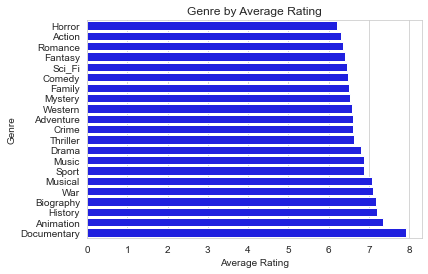

In [926]:
sns.barplot(x = 'averagerating',
            y = 'Movie Genre',
            data = crosstab_genres,
            color = 'Blue')
            

plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Genre by Average Rating')

In [927]:
# querying average rating and runtime minutes

In [928]:
runtime_rating = pd.read_sql("""
SELECT averagerating, runtime_minutes
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
WHERE runtime_minutes <= 200
""", conn)

In [929]:
runtime_rating

,averagerating,runtime_minutes
0,7.0,175.0
1,7.2,114.0
2,6.9,122.0
3,6.5,80.0
4,8.1,83.0
...,...,...
66073,8.4,130.0
66074,6.2,86.0
66075,6.2,75.0
66076,8.7,98.0


In [930]:
runtime_rating['runtime_hours'] = runtime_rating['runtime_minutes'] / 60#dividing runtime by 60 to get total minutes

In [931]:
runtime_rating = runtime_rating.apply(pd.to_numeric, errors = 'coerce')
runtime_rating = runtime_rating.dropna()#dropping an null values

In [932]:
runtime_rating.sort_values('runtime_hours', ascending=False)#sorting runtime ratings by descending 

,averagerating,runtime_minutes,runtime_hours
63626,9.2,200.0,3.333333
46437,2.6,200.0,3.333333
234,9.3,200.0,3.333333
49140,8.1,200.0,3.333333
1079,4.5,200.0,3.333333
...,...,...,...
59742,9.4,4.0,0.066667
51953,4.3,4.0,0.066667
18951,6.2,3.0,0.050000
42874,6.7,3.0,0.050000


### creating barplot for "how long is too long"

Text(0.5, 1.0, 'How long is too long?')

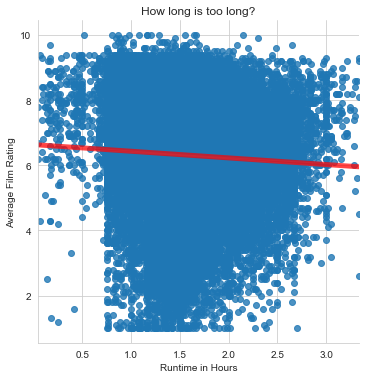

In [933]:
sns.lmplot(data = runtime_rating, x = 'runtime_hours', y = 'averagerating', line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set_style('whitegrid')

plt.ylabel('Average Film Rating')
plt.xlabel('Runtime in Hours')
plt.title('How long is too long?')

In [934]:
#inserting tn_movie_budgets_df into SQL db

In [935]:
import subprocess
subprocess.run(["sqlite3", "im.db", ".mode csv", ".import UnzippedData/tn.movie_budgets.csv movie_budgets"], capture_output=True)

CompletedProcess(args=['sqlite3', 'im.db', '.mode csv', '.import UnzippedData/tn.movie_budgets.csv movie_budgets'], returncode=0, stdout=b'', stderr=b'')

In [936]:
#importing tmdb.movies into SQl

In [937]:
import subprocess
subprocess.run(["sqlite3", "im.db", ".mode csv", ".import UnzippedData/tmdb.movies.csv tmdb_movies"], capture_output=True)

CompletedProcess(args=['sqlite3', 'im.db', '.mode csv', '.import UnzippedData/tmdb.movies.csv tmdb_movies'], returncode=0, stdout=b'', stderr=b'')

In [1107]:
gross_vs_averate = pd.read_sql("""
SELECT DISTINCT movie, title, vote_average, worldwide_gross
FROM movie_budgets
INNER JOIN tmdb_movies
    ON movie_budgets.movie = tmdb_movies.title
""", conn)
#query for movie, title, voteaverage, worldwide gross from tmbd movies and movie_budgets

### Gross vs average rating clean up

In [939]:
gross_vs_averate['worldwide_gross'] = gross_vs_averate['worldwide_gross'].str.replace('$', '')#removing $

In [940]:
gross_vs_averate['worldwide_gross'] = gross_vs_averate['worldwide_gross'].str.replace(',', '')#removing commas

In [941]:
gross_vs_averate['worldwide_gross'] = gross_vs_averate['worldwide_gross'].astype('int64')#setting worldwide gross as int

In [942]:
gross_vs_averate['vote_average'] = gross_vs_averate['vote_average'].astype('float')#setting vote average as float

In [943]:
gross_vs_averate.drop(gross_vs_averate[gross_vs_averate['worldwide_gross'] == 0].index, inplace=True)#dropping unused column

In [1095]:
gross_vs_averate.sort_values(by = "worldwide_gross", ascending = False)

,movie,title,vote_average,worldwide_gross
0,Avatar,Avatar,7.4,2776345279
3,Avengers: Infinity War,Avengers: Infinity War,8.3,2048134200
23,Jurassic World,Jurassic World,6.6,1648854864
50,Furious 7,Furious 7,7.3,1518722794
18,The Avengers,The Avengers,7.6,1517935897
...,...,...,...,...
1953,Eddie: The Sleepwalking Cannibal,Eddie: The Sleepwalking Cannibal,6.2,1632
1461,Skin Trade,Skin Trade,5.6,1242
2011,Childless,Childless,4.5,1036
2078,Higher Power,Higher Power,4.9,528


In [1098]:
middle_range = gross_vs_averate.loc[948:1048]

In [1102]:
gross_vs_averate_head_tail_middle = gross_vs_averate.head(100).append(gross_vs_averate.tail(100).append(middle_range))

In [1103]:
gross_vs_averate_head_tail_middle

,movie,title,vote_average,worldwide_gross
0,Avatar,Avatar,7.4,2776345279
1,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,6.4,1045663875
2,Avengers: Age of Ultron,Avengers: Age of Ultron,7.3,1403013963
3,Avengers: Infinity War,Avengers: Infinity War,8.3,2048134200
4,Justice League,Justice League,6.2,655945209
...,...,...,...,...
1044,Silent Hill: Revelation 3D,Silent Hill: Revelation 3D,5.2,55975672
1045,Flatliners,Flatliners,5.7,45173738
1046,Lockout,Lockout,5.9,33943049
1047,What's Your Number?,What's Your Number?,6.4,30163785


### plotting worldwide gross vs average rating

Text(0.5, 1.0, 'Average Rating vs Total Gross')

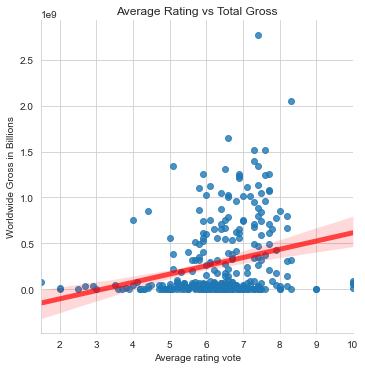

In [1104]:
sns.lmplot(x = 'vote_average',
           y = 'worldwide_gross',
           data = gross_vs_averate_head_tail_middle,
           line_kws={"color":"r","alpha":0.7,"lw":5})


plt.ticklabel_format(style='sci', axis='y', scilimits=(9,9))
plt.xlabel('Average rating vote')
plt.ylabel('Worldwide Gross in Billions')
plt.title('Average Rating vs Total Gross')

### top writers query of top genres

In [946]:
#query for top genre writers from im.db

In [976]:
documentary_writers = pd.read_sql("""
SELECT primary_name, averagerating, category, genres
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'writer' AND genres LIKE 'Documentary' AND death_year is Null AND numvotes > 200
""", conn)

In [977]:
top_ten_documentary_writers = documentary_writers.sort_values(by = 'averagerating', ascending = False).head(10)# sorting values by average rating descending

In [978]:
top_ten_documentary_writers.rename(columns = {'primary_name' : 'Writer name'}, inplace = True)# changing name of writers column

In [979]:
top_ten_documentary_writers.rename(columns = {'averagerating' : 'Average rating'}, inplace = True)# changing column name to Average Rating

In [980]:
top_ten_documentary_writers

,Writer name,Average rating,category,genres
378,Andrea Batilla,9.5,writer,Documentary
355,Mukunda Michael Dewil,9.5,writer,Documentary
354,Mukunda Das,9.5,writer,Documentary
351,Mike Tucker,9.5,writer,Documentary
370,Alex Paun,8.9,writer,Documentary
245,Mark Masterton,8.9,writer,Documentary
276,Tanya Mahar,8.7,writer,Documentary
361,Joseph Pace,8.7,writer,Documentary
360,Mark Monroe,8.7,writer,Documentary
359,Shannon Kornelsen,8.7,writer,Documentary


In [176]:
#Finding Top Ten Biography Writers

In [177]:
Biography_writers = pd.read_sql("""
SELECT primary_name, averagerating, category, genres
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'writer' AND genres LIKE 'Biography' AND numvotes > 200 AND death_year is Null
""", conn)

In [178]:
top_ten_bio_writers = Biography_writers.sort_values(by = 'averagerating', ascending = False).head(10)#sorting bio writers by descending average rating

In [179]:
top_ten_bio_writers.rename(columns = {'primary_name' : 'Writer name'}, inplace = True)#renaming writer name column

In [180]:
top_ten_bio_writers.rename(columns = {'averagerating' : 'Average Rating'}, inplace = True)#rename column Average Rating

In [181]:
top_ten_bio_writers

,Writer name,Average Rating,category,genres
13,Bienvenido Santiago,8.6,writer,Biography
15,Harjeet Singh,8.5,writer,Biography
14,Tejinder Harjit,8.5,writer,Biography
2,Shahzad Firdaus,8.0,writer,Biography
22,Luke Hwong,7.4,writer,Biography
21,Tony Hu,7.4,writer,Biography
20,Wong Siew Chooi,7.4,writer,Biography
17,Matt Harvey,7.3,writer,Biography
16,Dominic Morgan,7.3,writer,Biography
10,Ben Sihombing,7.1,writer,Biography


In [182]:
# query for top ten animation writers

In [183]:
animation_writers = pd.read_sql("""
SELECT primary_name, averagerating, category, genres
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'writer' AND genres LIKE 'Animation' AND numvotes > 200 AND death_year is Null
""", conn)

In [184]:
top_ten_animation_writers = animation_writers.sort_values(by = 'averagerating', ascending = False).head(10)#sorting animation writers by descending

In [185]:
top_ten_animation_writers.rename(columns = {'primary_name' : 'Writer name'}, inplace = True)#rename column Writer name

In [186]:
top_ten_animation_writers.rename(columns = {'averagerating' : 'Average Rating'}, inplace = True)#rename column Average rating

In [187]:
top_ten_animation_writers

,Writer name,Average Rating,category,genres
33,Usha Kaljai,9.2,writer,Animation
37,Jyoti Deshpande,8.4,writer,Animation
38,Pathik Vats,8.4,writer,Animation
41,Nur Naquyah bt Burhanuddin,8.1,writer,Animation
39,Aliya bt Nazlan,8.1,writer,Animation
40,Hjh. Ainon Ariff,8.1,writer,Animation
44,Daraka Wongsiri,7.9,writer,Animation
43,Bryan Edward Hill,7.9,writer,Animation
42,Suphakorn Riansuwan,7.9,writer,Animation
26,Yana Toboso,7.7,writer,Animation


In [188]:
#query for top ten musical writers

In [957]:
history_writers = pd.read_sql("""
SELECT primary_name, averagerating, category, genres
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'writer' AND genres LIKE 'History' AND numvotes > 200 AND death_year is Null
""", conn)

In [958]:
top_ten_history_writers = history_writers.sort_values(by = 'averagerating', ascending = False).head(10)#sorting musical writers by descending

In [959]:
top_ten_history_writers.rename(columns = {'primary_name' : 'Writer name'}, inplace = True)#rename column Writer name

In [960]:
top_ten_history_writers.rename(columns = {'averagerating' : 'Average Rating'}, inplace = True)#rename column average rating

In [961]:
top_ten_history_writers

,Writer name,Average Rating,category,genres
3,Kaustubh Savarkar,8.3,writer,History
4,Deniz Aydenk,7.4,writer,History
2,Eriko Komatsu,7.3,writer,History
1,Giancarlo De Cataldo,6.5,writer,History
0,Joaquín Andújar,6.0,writer,History


In [981]:
# finding top war writers

In [982]:
war_writers = pd.read_sql("""
SELECT primary_name, averagerating, category, genres
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'writer' AND genres LIKE 'War' AND numvotes > 200 AND death_year is Null
""", conn)

In [984]:
top_ten_war_writers = war_writers.sort_values(by = 'averagerating', ascending = False).head(10)

In [985]:
top_ten_war_writers.rename(columns = {'primary_name' : 'Writer name'}, inplace = True)#rename column Writer name

In [987]:
top_ten_war_writers.rename(columns = {'averagerating' : 'Average Rating'}, inplace = True)#rename column average rating

In [988]:
top_ten_war_writers

,Writer name,Average Rating,category,genres
0,Muhammad Zafar Iqbal,8.2,writer,War
1,Barkat Ullah Maruf,8.2,writer,War
2,Natasa Drakulic,7.9,writer,War
3,Sharron Jones,3.6,writer,War


In [194]:
pd.read_sql_query("SELECT * from sqlite_master;", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,movie_budgets,movie_budgets,41369,"CREATE TABLE movie_budgets(\n ""id"" TEXT,\n ""..."
9,table,tmdb_movies,tmdb_movies,41472,"CREATE TABLE tmdb_movies(\n """" TEXT,\n ""genr..."


In [195]:
#adding profit column

In [196]:
tn_movie_budgets_df['Profit'] = tn_movie_budgets_df['worldwide_gross'] - tn_movie_budgets_df['production_budget']

### gross with range of production budget

In [197]:
#printing df of under 100million budget

In [198]:
under_onehundred_mill = tn_movie_budgets_df[tn_movie_budgets_df['production_budget'] <= 100000000] 

In [199]:
#printing df of between 100 and 200 million budget

In [200]:
between_one_twohundredmill = tn_movie_budgets_df[tn_movie_budgets_df['production_budget'].between(100000001, 200000000)] 

In [201]:
#printing df of between 200 and 300 million budget

In [202]:
between_two_threehundredmill = tn_movie_budgets_df[tn_movie_budgets_df['production_budget'].between(200000001, 300000000)] 

In [203]:
#printing df of between 300 and 400 million budget

In [204]:
between_three_fourhundredmill = tn_movie_budgets_df[tn_movie_budgets_df['production_budget'].between(300000001, 400000000)]

In [205]:
#printing df of between 400 and 500 million budget

In [206]:
between_four_fivehundredmill = tn_movie_budgets_df[tn_movie_budgets_df['production_budget'].between(400000001, 500000000)]

In [208]:
average_gross_per_hundredmill = []

In [209]:
average_gross_per_hundredmill

[]

In [210]:
# average gross of movies with budget under 100mill

In [211]:
under_onehundred_mill_avg = under_onehundred_mill['worldwide_gross'].mean()
average_gross_per_hundredmill.append(under_onehundred_mill_avg)

In [212]:
#average gross of all movies with budget between one and two hundred million

In [213]:
between_one_twohundredmill_avg = between_one_twohundredmill['worldwide_gross'].mean()
average_gross_per_hundredmill.append(between_one_twohundredmill_avg)

In [214]:
#average gross of all moves with a budget between two and three hundred million

In [215]:
between_two_threehundredmill_avg = between_two_threehundredmill['worldwide_gross'].mean()
average_gross_per_hundredmill.append(between_two_threehundredmill_avg)

In [216]:
#average gross of movies with a budget between three and four hundred million

In [217]:
between_three_fourhundredmill_avg = between_three_fourhundredmill['worldwide_gross'].mean()
average_gross_per_hundredmill.append(between_three_fourhundredmill_avg)

In [218]:
between_three_fourhundredmill_avg

1230702320.0

In [219]:
#average gross of movies with a budget between four and five hundred million

In [220]:
between_four_fivehundredmill_avg = between_four_fivehundredmill['worldwide_gross'].mean()
average_gross_per_hundredmill.append(between_four_fivehundredmill_avg)

In [221]:
between_four_fivehundredmill_avg

1911004577.0

In [222]:
budget_range = ['Under 100 million', 'Between 100 and 200 million', 'Between 200 and 300 million', 'Between 300 and 400 million', 'Between 400 and 500 million']
#creating list of column names of ranges

In [223]:
average_gross_profit = pd.DataFrame(list(zip(budget_range, average_gross_per_hundredmill)))
#creating dataframe with lists of budget range and average gross per hundred mill

In [224]:
average_gross_profit.columns = ['Budget Range', 'Average Gross']
#creating column names

In [225]:
average_gross_profit

,Budget Range,Average Gross
0,Under 100 million,6.773081e+07
1,Between 100 and 200 million,4.666716e+08
2,Between 200 and 300 million,8.054373e+08
3,Between 300 and 400 million,1.230702e+09
4,Between 400 and 500 million,1.911005e+09


In [226]:
average_gross_profit['Average Gross'] = average_gross_profit['Average Gross'].astype('int64')
#changing datatype of average gross to integer64

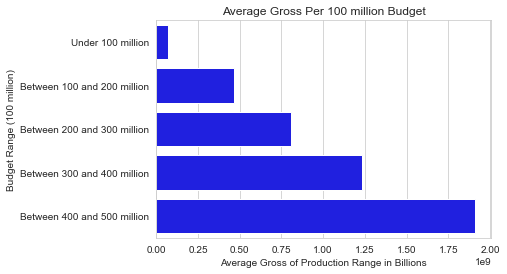

In [1115]:
sns.barplot(x="Average Gross", y="Budget Range", data=average_gross_profit.reset_index(), color='Blue')

plt.ylabel('Budget Range (100 million)')
plt.xlabel('Average Gross of Production Range in Billions')
plt.title('Average Gross Per 100 million Budget')
plt.ticklabel_format(style='sci', axis='x', scilimits=(9,9))

### Profit vs budget

In [228]:
avg_profit_per_hundred_mill = []# create new avg profit list

In [229]:
#avg profit of movies under 100 million budget

In [230]:
under_100mill_avg_profit = under_onehundred_mill['Profit'].mean()
avg_profit_per_hundred_mill.append(under_100mill_avg_profit)

In [231]:
under_100mill_avg_profit

43393439.486047894

In [232]:
#avg profit movies between 100 million and 200 million budget

In [233]:
between_one_twohundredmill_avg_profit = between_one_twohundredmill['Profit'].mean()
avg_profit_per_hundred_mill.append(between_one_twohundredmill_avg_profit)

In [234]:
between_one_twohundredmill_avg_profit

321039476.89096576

In [235]:
#avg profit movies between 200 million and 300 million budget

In [236]:
between_two_threehundredmill_avg_profit = between_two_threehundredmill['Profit'].mean()
avg_profit_per_hundred_mill.append(between_two_threehundredmill_avg_profit)

In [237]:
between_two_threehundredmill_avg_profit

562608736.2857143

In [238]:
#avg profit movies between 300 million and 400 million budget

In [239]:
between_three_fourhundredmill_avg_profit = between_three_fourhundredmill['Profit'].mean()
avg_profit_per_hundred_mill.append(between_three_fourhundredmill_avg_profit)

In [240]:
between_three_fourhundredmill_avg_profit

904802320.0

In [241]:
#avg profit movies between 400 million and 500 million budget

In [242]:
between_four_fivehundredmill_avg_profit = between_four_fivehundredmill['Profit'].mean()
avg_profit_per_hundred_mill.append(between_four_fivehundredmill_avg_profit)

In [243]:
between_four_fivehundredmill_avg_profit

1493204577.0

In [244]:
avg_profit_per_hundred_mill

[43393439.486047894,
 321039476.89096576,
 562608736.2857143,
 904802320.0,
 1493204577.0]

In [245]:
average_gross_profit['Average Profit'] = avg_profit_per_hundred_mill

In [246]:
average_gross_profit['Average Profit'] = average_gross_profit['Average Profit'].astype('int64')

In [247]:
average_gross_profit

,Budget Range,Average Gross,Average Profit
0,Under 100 million,67730813,43393439
1,Between 100 and 200 million,466671564,321039476
2,Between 200 and 300 million,805437307,562608736
3,Between 300 and 400 million,1230702320,904802320
4,Between 400 and 500 million,1911004577,1493204577


Text(0.5, 1.0, 'Average Profit per 100 million dollar budget range')

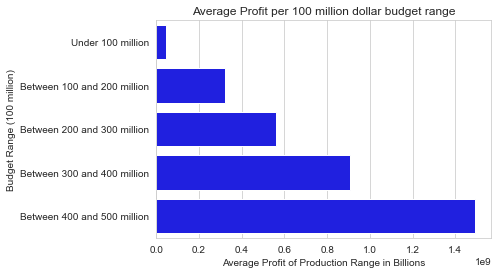

In [248]:
sns.barplot(x = 'Average Profit',
            y = 'Budget Range',
            data = average_gross_profit,
            color = "Blue")


plt.xlabel('Average Profit of Production Range in Billions')
plt.ylabel('Budget Range (100 million)')
plt.title('Average Profit per 100 million dollar budget range')

###  Month of release vs average profit

In [249]:
avg_month_profit = []

In [250]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [251]:
jan_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'Jan']# df with only release date of january
jan_avg_profit = jan_profit['Profit'].mean()
avg_month_profit.append(jan_avg_profit)

In [252]:
jan_profit.count()

id                   328
release_date         328
movie                328
production_budget    328
domestic_gross       328
worldwide_gross      328
Profit               328
dtype: int64

In [253]:
jan_avg_profit

27481054.68292683

In [254]:
feb_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'Feb']# df with only release date of February
feb_avg_profit = feb_profit['Profit'].mean()
avg_month_profit.append(feb_avg_profit)

In [255]:
feb_avg_profit

46604886.145945944

In [256]:
mar_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'Mar']# df with only release date of March
mar_avg_profit = mar_profit['Profit'].mean()
avg_month_profit.append(mar_avg_profit)

In [257]:
mar_avg_profit

53451599.05227273

In [258]:
apr_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'Apr']# df with only release date of April
apr_avg_profit = apr_profit['Profit'].mean()
avg_month_profit.append(apr_avg_profit)

In [259]:
apr_avg_profit

38033596.74364896

In [260]:
may_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'May']# df with only release date of may
may_avg_profit = may_profit['Profit'].mean()
avg_month_profit.append(may_avg_profit)

In [261]:
may_avg_profit

119363697.24936387

In [262]:
jun_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'Jun']# df with only release date of june
jun_avg_profit = jun_profit['Profit'].mean()
avg_month_profit.append(jun_avg_profit)

In [263]:
jun_avg_profit

103891329.72984749

In [264]:
jul_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'Jul']# df with only release date of july
jul_avg_profit = jul_profit['Profit'].mean()
avg_month_profit.append(jul_avg_profit)

In [265]:
jul_avg_profit

102265411.50471698

In [266]:
aug_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'Aug']# df with only release date of august
aug_avg_profit = aug_profit['Profit'].mean()
avg_month_profit.append(aug_avg_profit)

In [267]:
aug_avg_profit

37484949.60042283

In [268]:
sep_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'Sep']# df with only release date of september
sep_avg_profit = sep_profit['Profit'].mean()
avg_month_profit.append(sep_avg_profit)

In [269]:
sep_avg_profit

26675599.240343347

In [270]:
oct_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'Oct']# df with only release date of october
oct_avg_profit = oct_profit['Profit'].mean()
avg_month_profit.append(oct_avg_profit)

In [271]:
oct_avg_profit

30915656.58118081

In [272]:
nov_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'Nov']# df with only release date of november
nov_avg_profit = nov_profit['Profit'].mean()
avg_month_profit.append(nov_avg_profit)

In [273]:
nov_avg_profit

97593712.35193133

In [274]:
dec_profit = tn_movie_budgets_df[tn_movie_budgets_df['release_date'] == 'Dec']# df with only release date of december
dec_avg_profit = dec_profit['Profit'].mean()
avg_month_profit.append(dec_avg_profit)

In [275]:
dec_avg_profit

83768191.87278584

In [276]:
avg_month_profit

[27481054.68292683,
 46604886.145945944,
 53451599.05227273,
 38033596.74364896,
 119363697.24936387,
 103891329.72984749,
 102265411.50471698,
 37484949.60042283,
 26675599.240343347,
 30915656.58118081,
 97593712.35193133,
 83768191.87278584]

In [277]:
monthly_profit = pd.DataFrame(list(zip(months, avg_month_profit)))# creating df from lists

In [278]:
monthly_profit.columns = ['Month of Release', 'Average Profit']
#creating column names

In [279]:
monthly_profit['Average Profit'] = monthly_profit['Average Profit'].astype('int64')# changing column average profit to int64

In [280]:
# creating barplot to show average profit vs monthly release

Text(0.5, 1.0, 'Movie average profit per month')

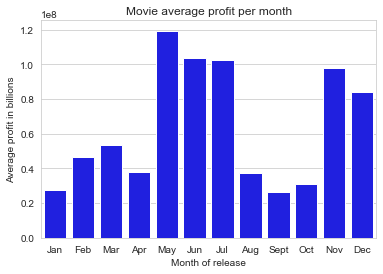

In [281]:
sns.barplot(x= 'Month of Release',
            y = 'Average Profit',
            data = monthly_profit,
            color = 'Blue')

plt.ylabel('Average profit in billions')
plt.xlabel('Month of release')
plt.title('Movie average profit per month')

In [282]:
# new list with total profits per month

In [283]:
total_monlthy_profit = pd.DataFrame(tn_movie_budgets_df.groupby('release_date')['Profit'].sum().reset_index())

In [284]:
extracted_column = total_monlthy_profit['Profit']# extracting values of total monthly profit

In [285]:
monthly_profit['Total Profit'] = extracted_column# setting new column in monthly profit

In [286]:
# creating barplot month of release vs total profit

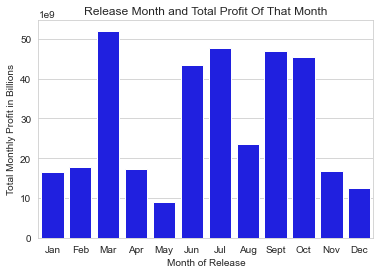

In [287]:
sns.barplot(x = 'Month of Release',
            y = 'Total Profit',
            data = monthly_profit,
            color = "Blue")

plt.xlabel('Month of Release')
plt.ylabel('Total Monthly Profit in Billions')
plt.title('Release Month and Total Profit Of That Month')

plt.ticklabel_format(style='sci', axis='y', scilimits=(9,9))

In [288]:
monthly_movie_count = pd.DataFrame(tn_movie_budgets_df['release_date'].value_counts().reset_index())#getting counts of all movies per month

In [289]:
monthly_profit['Total Movies'] = monthly_movie_count['release_date']

In [290]:
monthly_profit

,Month of Release,Average Profit,Total Profit,Total Movies
0,Jan,27481054,16468547390,621
1,Feb,46604886,17730381161,542
2,Mar,53451599,52020047153,473
3,Apr,38033596,17243807874,466
4,May,119363697,9013785936,466
5,Jun,103891329,43360534478,459
6,Jul,102265411,47686120346,440
7,Aug,37484949,23518703583,433
8,Sept,26675599,46909933019,424
9,Oct,30915656,45478669956,393


In [291]:
#bar plot to show number of movies per month

Text(0.5, 1.0, 'Which months have the most movies?')

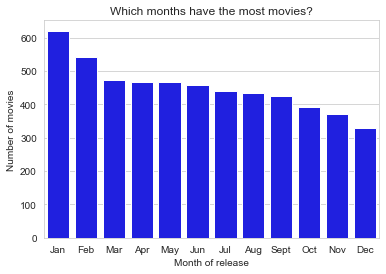

In [292]:
sns.barplot(x = 'Month of Release',
            y = 'Total Movies',
            data = monthly_profit,
            color = 'Blue')

plt.xlabel('Month of release')
plt.ylabel('Number of movies')
plt.title('Which months have the most movies?')